In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/rlms_hse.csv')
columns = ['u.age', 'uh5', 'um1', 'um2', 'region']
data_compact = data[columns]
data_compact = data_compact.rename(columns = {
    'u.age' : 'age', 'uh5': 'gender', 'um1' : 'weight', 'um2' : 'height'})
data_compact.head()

,age,gender,weight,height,region
0,61.0,2,89.0,164.0,1
1,72.0,2,99999997.0,162.0,1
2,70.0,2,50.0,154.0,1
3,62.0,2,84.0,165.0,1
4,59.0,1,59.0,165.0,1


In [ ]:
data = data_compact
del data_compact

In [ ]:
data = data[(data['age'] < 1000) & \
                    (data['height'] < 1000) & \
                    (data['weight'] < 1000)]

In [ ]:
data.loc[data['age'] < 18, 'age_group'] = 'young'
data.loc[data['age']  >= 18, 'age_group'] = 'old'
data.loc[data['gender'] == 1, 'gender'] = 'male'


men = data[(data['gender'] == 'male') & \
                (data['age_group'] == 'old')& \
                (data['region'] == 14)]
men.head(100)

<ipython-input-6-ba52d49aa1c1>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['gender'] == 1, 'gender'] = 'male'


,age,gender,weight,height,region,age_group
162,78.0,male,77.0,162.0,14,old
164,74.0,male,78.0,163.0,14,old
166,61.0,male,80.0,176.0,14,old
169,38.0,male,87.0,180.0,14,old
172,51.0,male,72.0,172.0,14,old
...,...,...,...,...,...,...
5340,64.0,male,78.0,168.0,14,old
5342,50.0,male,91.0,172.0,14,old
7366,36.0,male,98.0,170.0,14,old
7369,41.0,male,105.0,180.0,14,old


In [ ]:
men.shape

(79, 6)

Задание №1

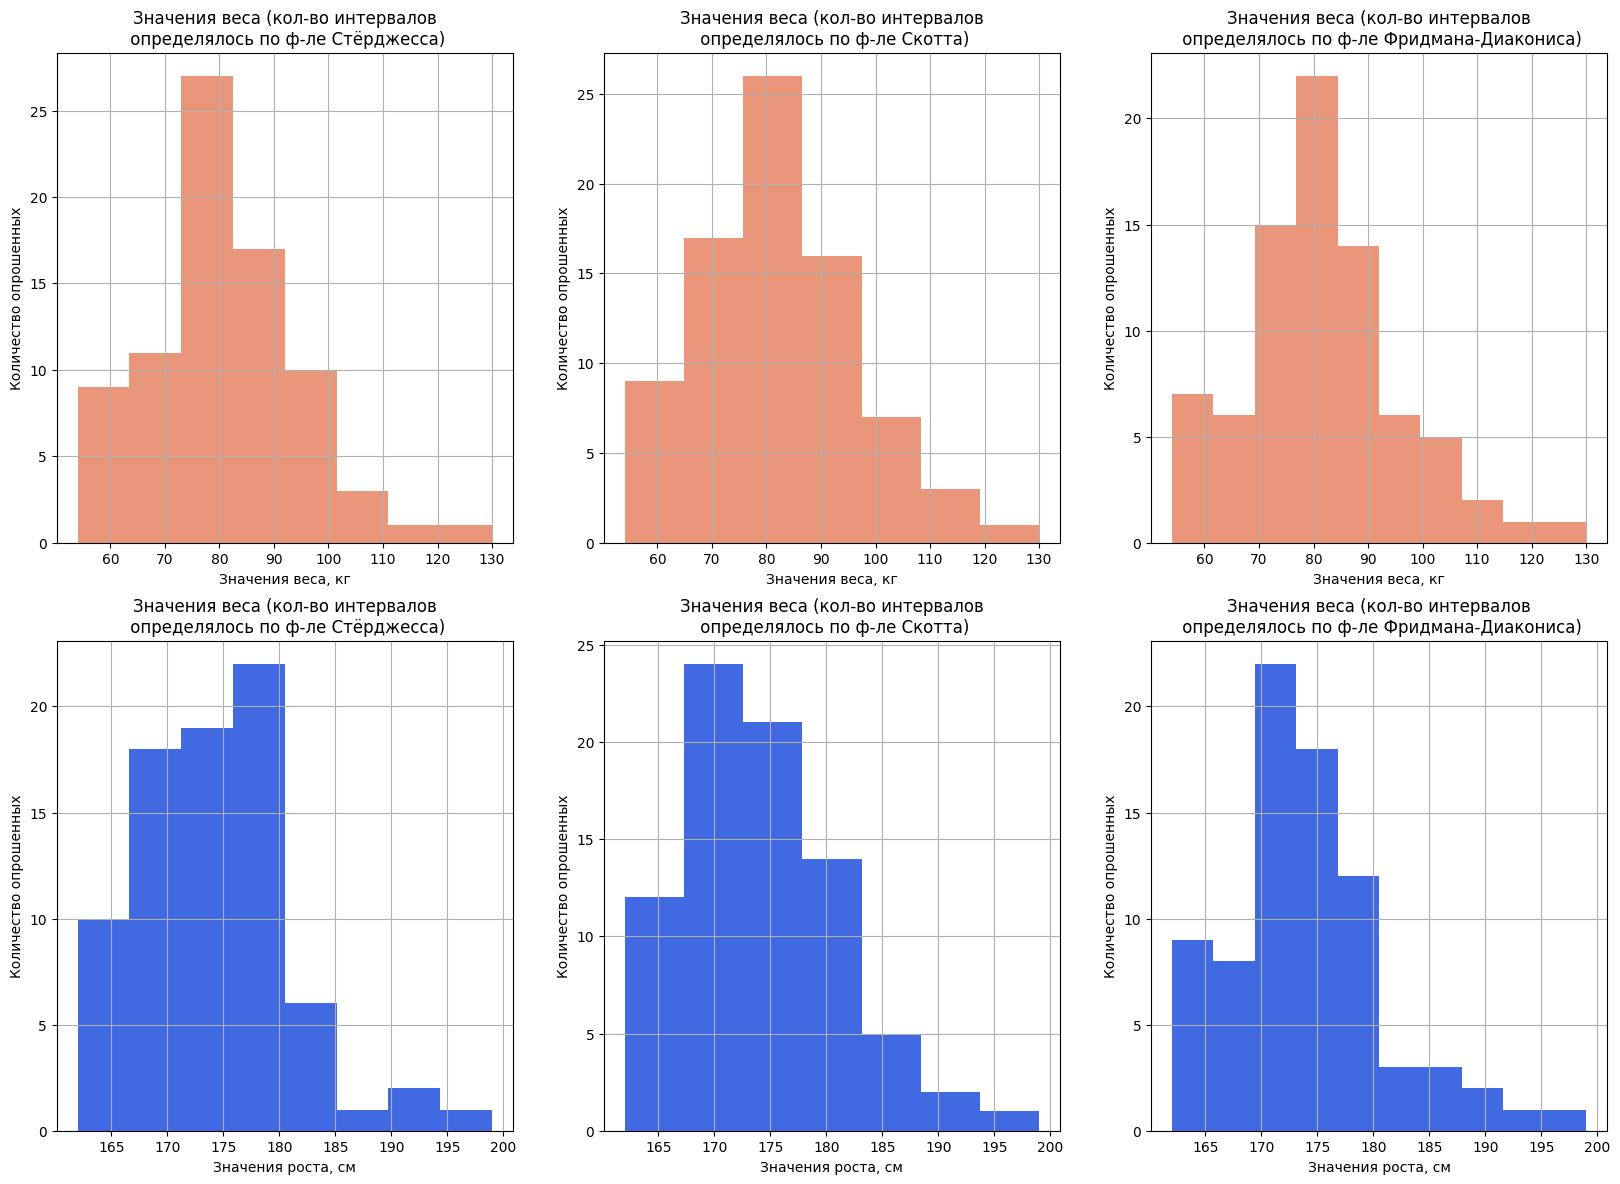

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 14))

plt.subplot(2, 3, 1)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Стёрджесса)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.weight, bins = 'sturges', color='darksalmon')    # построение гистограммы

plt.subplot(2, 3, 2)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Скотта)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.weight, bins = 'scott', color='darksalmon')    # построение гистограммы

plt.subplot(2, 3, 3)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Фридмана-Диакониса)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.weight, bins = 'fd', color='darksalmon')    # построение гистограммы


plt.subplot(2, 3, 4)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Стёрджесса)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.height, bins = 'sturges', color='royalblue')    # построение гистограммы

plt.subplot(2, 3, 5)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Скотта)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.height, bins = 'scott', color='royalblue')    # построение гистограммы


plt.subplot(2, 3, 6)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Фридмана-Диакониса)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(men.height, bins = 'fd', color='royalblue')    # построение гистограммы
plt.show()

*Проверим значения интервалов*

In [ ]:

k=1+ np.log2(len(men.weight))
print("Количество интервалов по формуле Стерджесса:", int(np.ceil(k)))

k_weight=int(np.ceil((max(men.weight)-min(men.weight))/(3.5*np.std(men.weight)*len(men.weight)**(-1/3))))
k_height=int(np.ceil((max(men.height)-min(men.height))/(3.5*np.std(men.height)*len(men.height)**(-1/3))))
print("Количество интервалов по формуле Стерджесса для данных веса: %d, для данных роста: %d." %(k_weight, k_height))

k_weight=int(np.ceil((max(men.weight)-min(men.weight))/(2*(np.percentile(men.weight, 75) - np.percentile(men.weight, 25))*len(men.weight)**(-1/3))))
k_height=int(np.ceil((max(men.height)-min(men.height))/(2*(np.percentile(men.height, 75) - np.percentile(men.height, 25))*len(men.height)**(-1/3))))
print("Количество интервалов по формуле Фридмана - Диакониса для данных веса: %d, для данных роста: %d." %(k_weight, k_height))

Количество интервалов по формуле Стерджесса: 8
Количество интервалов по формуле Стерджесса для данных веса: 7, для данных роста: 7.
Количество интервалов по формуле Фридмана - Диакониса для данных веса: 10, для данных роста: 10.


Вывод по заданию №1: были построены гистограммы распределения для наборов данных роста и веса. Количество интервалов было вычеслено по формулам Стерджесса, Стокса и Фридмана - Диакониса. Полученные значения количества интервалов совпали со значениями, определяемыми программно.

Задание №2

Для набора данных роста:

In [ ]:
import statistics

print("Минимальное значение роста: ", min(men.height))
print("Максимальное значение роста: ", max(men.height))
print("Среднее значение роста: ", round(sum(men.height)/len(men.height),2))
print("Миедианное значение роста: ", statistics.median(men.height))
print("Стандартное отклонение: ", round(np.std(men.height),2))


Минимальное значение роста:  162.0
Максимальное значение роста:  199.0
Среднее значение роста:  174.18
Миедианное значение роста:  174.0
Стандартное отклонение:  6.89


Для набора данных веса:

In [ ]:
print("Минимальное значение веса: ", min(men.weight))
print("Максимальное значение веса: ", max(men.weight))
print("Среднее значение веса: ", round(sum(men.weight)/len(men.weight),2))
print("Миедианное значение веса: ", statistics.median(men.weight))
print("Стандартное отклонение: ", round(np.std(men.weight),2))


Минимальное значение веса:  54.0
Максимальное значение веса:  130.0
Среднее значение веса:  81.59
Миедианное значение веса:  80.0
Стандартное отклонение:  14.19


Задание №3

Тест Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro, normaltest, kstest
stat, p = shapiro(men.height)
print("p = ", p)

alpha = 0.05  # уровень значимости

if p > alpha:
	print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
	print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')


stat, p = shapiro(men.weight)

print("p = ", p)
alpha = 0.05  # уровень значимости

if p > alpha:
	print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
	print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.18583221605253425
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).
p =  1.8674997092046943e-05
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).


Тест Колмогорова-Смирнова

In [ ]:



statistic, pvalue = kstest(men.height, 'norm', args=(np.mean(men.height), np.std(men.height)))
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
    print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

statistic, pvalue = kstest(men.weight, 'norm', args=(np.mean(men.weight), np.std(men.weight)))
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
    print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.7634171325136825
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).
p =  0.02892896493335284
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).



Тест Д'Агостино

In [ ]:
statistic, pvalue = normaltest(men.height)
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))')
else:
    print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')


statistic, pvalue = normaltest(men.weight)
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))')
else:
    print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.7105055503963573
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))
p =  0.0006511145743786286
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).


Выводы
1. Тест Шапиро-Уилка
Результаты теста Шапиро-Уилка для столбца роста показывает, что распределение нормальное, а для столбца веса - значительное отклонение от нормальности с p-значением, близким к нулю. Данный тест очень чувствителен и может выявить отклонения даже при небольших выборках.

2. Тест Колмогорова-Смирнова
Тест Колмогорова-Смирнова указал на нормальное распределение в столбце роста со значением p значительно выше уровня значимости 0.05, что указывает на отсутствие статистически значимого отклонения от нормального распределения для этой переменной. Для столбца веса тест показал отклонение от нормального распределения. Однако следует отметить, что тест Колмогорова-Смирнова менее чувствителен и может пропустить отклонения, которые выявляет тест Шапиро-Уилка.

3. Тест Пирсона
Результаты теста Пирсона показали, что для столбца роста p-значение составило 0.71, что говорит о нормальности распределения. Однако для столбца веса p-значение указывает на статистически значимое отклонение от нормального распределения. Тест Пирсона может быть менее чувствителен к крайним выбросам и более устойчив к нормальности в больших выборках.

##Дополнительное задание: исследование респондентов детского возраста

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/rlms_hse.csv')
columns = ['u.age', 'uh5', 'um1', 'um2', 'region']
data_compact = data[columns]
data_compact = data_compact.rename(columns = {
    'u.age' : 'age', 'uh5': 'gender', 'um1' : 'weight', 'um2' : 'height'})
data_compact.head()

,age,gender,weight,height,region
0,61.0,2,89.0,164.0,1
1,72.0,2,99999997.0,162.0,1
2,70.0,2,50.0,154.0,1
3,62.0,2,84.0,165.0,1
4,59.0,1,59.0,165.0,1


In [ ]:
data = data_compact
del data_compact

In [ ]:
data = data[(data['age'] < 1000) & \
                    (data['height'] < 1000) & \
                    (data['weight'] < 1000)]

In [ ]:
data.loc[data['age'] < 18, 'age_group'] = 'young'
data.loc[data['age']  >= 18, 'age_group'] = 'old'
data.loc[data['gender'] == 1, 'gender'] = 'male'


boys = data[(data['gender'] == 'male') & \
                (data['age_group'] == 'young')& \
                (data['region'] == 14)]
boys.head(100)

,age,gender,weight,height,region,age_group
2690,16.0,male,85.0,175.0,14,young
3254,12.0,male,29.0,142.0,14,young
4227,17.0,male,64.0,174.0,14,young
4402,14.0,male,36.0,150.0,14,young
4403,12.0,male,35.0,135.0,14,young
4850,9.0,male,25.0,140.0,14,young
4854,8.0,male,25.0,110.0,14,young
4857,7.0,male,23.0,129.0,14,young
4859,10.0,male,25.0,128.0,14,young
4860,7.0,male,32.0,130.0,14,young


In [ ]:
boys.shape

(31, 6)

Задание №1

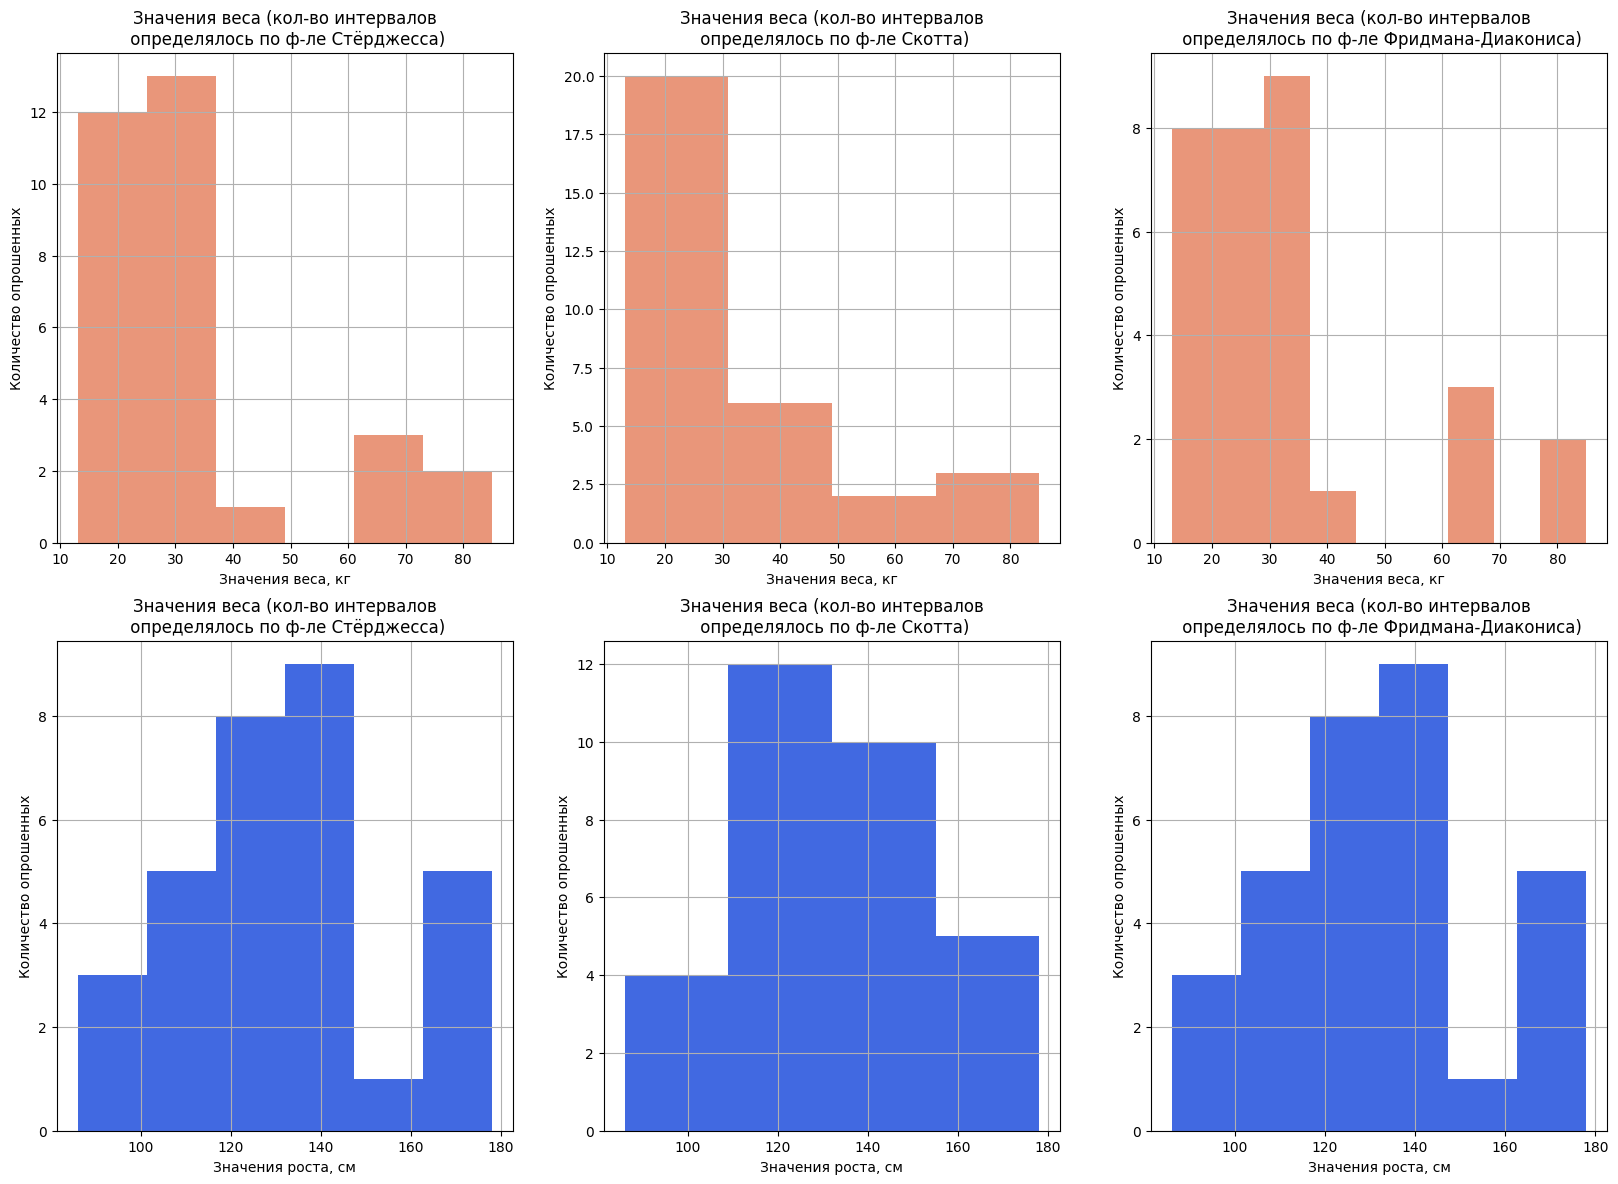

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 14))

plt.subplot(2, 3, 1)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Стёрджесса)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.weight, bins = 'sturges', color='darksalmon')    # построение гистограммы

plt.subplot(2, 3, 2)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Скотта)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.weight, bins = 'scott', color='darksalmon')    # построение гистограммы

plt.subplot(2, 3, 3)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Фридмана-Диакониса)") # заголовок
plt.xlabel("Значения веса, кг") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.weight, bins = 'fd', color='darksalmon')    # построение гистограммы


plt.subplot(2, 3, 4)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Стёрджесса)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.height, bins = 'sturges', color='royalblue')    # построение гистограммы

plt.subplot(2, 3, 5)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Скотта)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.height, bins = 'scott', color='royalblue')    # построение гистограммы


plt.subplot(2, 3, 6)
plt.title("Значения веса (кол-во интервалов\n определялось по ф-ле Фридмана-Диакониса)") # заголовок
plt.xlabel("Значения роста, см") # ось абсцисс
plt.ylabel("Количество опрошенных") # ось ординат
plt.grid()      # включение отображения сетки
plt.hist(boys.height, bins = 'fd', color='royalblue')    # построение гистограммы
plt.show()

*Проверим значения интервалов*

In [ ]:

k=1+ np.log2(len(boys.weight))
print("Количество интервалов по формуле Стерджесса:", int(np.ceil(k)))

k_weight=int(np.ceil((max(boys.weight)-min(boys.weight))/(3.5*np.std(boys.weight)*len(boys.weight)**(-1/3))))
k_height=int(np.ceil((max(boys.height)-min(boys.height))/(3.5*np.std(boys.height)*len(boys.height)**(-1/3))))
print("Количество интервалов по формуле Стерджесса для данных веса: %d, для данных роста: %d." %(k_weight, k_height))

k_weight=int(np.ceil((max(boys.weight)-min(boys.weight))/(2*(np.percentile(boys.weight, 75) - np.percentile(boys.weight, 25))*len(boys.weight)**(-1/3))))
k_height=int(np.ceil((max(boys.height)-min(boys.height))/(2*(np.percentile(boys.height, 75) - np.percentile(boys.height, 25))*len(boys.height)**(-1/3))))
print("Количество интервалов по формуле Фридмана - Диакониса для данных веса: %d, для данных роста: %d." %(k_weight, k_height))

Количество интервалов по формуле Стерджесса: 6
Количество интервалов по формуле Стерджесса для данных веса: 4, для данных роста: 4.
Количество интервалов по формуле Фридмана - Диакониса для данных веса: 9, для данных роста: 6.


Вывод по заданию №1: были построены гистограммы распределения для наборов данных роста и веса. Количество интервалов было вычеслено по формулам Стерджесса, Стокса и Фридмана - Диакониса. Полученные значения количества интервалов совпали со значениями, определяемыми программно.

Задание №2

Для набора данных роста:

In [ ]:
import statistics

print("Минимальное значение роста: ", min(boys.height))
print("Максимальное значение роста: ", max(boys.height))
print("Среднее значение роста: ", round(sum(boys.height)/len(boys.height),2))
print("Миедианное значение роста: ", statistics.median(boys.height))
print("Стандартное отклонение: ", round(np.std(boys.height),2))


Минимальное значение роста:  86.0
Максимальное значение роста:  178.0
Среднее значение роста:  131.81
Миедианное значение роста:  130.0
Стандартное отклонение:  23.88


Для набора данных веса:

In [ ]:
print("Минимальное значение веса: ", min(boys.weight))
print("Максимальное значение веса: ", max(boys.weight))
print("Среднее значение веса: ", round(sum(boys.weight)/len(boys.weight),2))
print("Миедианное значение веса: ", statistics.median(boys.weight))
print("Стандартное отклонение: ", round(np.std(boys.weight),2))


Минимальное значение веса:  13.0
Максимальное значение веса:  85.0
Среднее значение веса:  32.63
Миедианное значение веса:  26.0
Стандартное отклонение:  19.15


Задание №3

Тест Шапиро-Уилка

In [ ]:
from scipy.stats import shapiro, normaltest, kstest
stat, p = shapiro(boys.height)


alpha = 0.05  # уровень значимости
print("p = ", p)
if p > alpha:
	print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
	print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')


stat, p = shapiro(boys.weight)


alpha = 0.05  # уровень значимости
print("p = ", p)
if p > alpha:
	print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
	print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.18583221605253425
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).
p =  1.8674997092046943e-05
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).


Тест Колмогорова-Смирнова

In [ ]:



statistic, pvalue = kstest(boys.height, 'norm', args=(np.mean(boys.height), np.std(boys.height)))
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
    print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

statistic, pvalue = kstest(boys.weight, 'norm', args=(np.mean(boys.weight), np.std(boys.weight)))
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).')
else:
    print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.7634171325136825
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения)).
p =  0.02892896493335284
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).



Тест Д'Агостино

In [ ]:
statistic, pvalue = normaltest(boys.height)
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))')
else:
    print('Набор данных роста не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')


statistic, pvalue = normaltest(boys.weight)
print("p = ", pvalue)
if pvalue > 0.05:
    print('Набор данных веса имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))')
else:
    print('Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).')

p =  0.7105055503963573
Набор данных роста имеет нормальное распределение (не можем отклонить гипотезу о нормальности распределения))
p =  0.0006511145743786286
Набор данных веса не имеет нормального распределения (отклоняем гипотезу о нормальности распределения).


Выводы:  
Для выборки среди респондентов детского возраста все три теста показали одинаковый результат:
Для столбца роста показали, что распределение нормальное, а для столбца веса - значительное отклонение от нормальности.